<a href="https://colab.research.google.com/github/recanoy/Coursera_AlgorithmsForDNASequencing/blob/main/Week1_LectureNotes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course: Algorithms for DNA Sequencing
# Author: Raymart Jay E. Canoy
# Date: 12 October 2022
___

## Week 1

* Contents
  1. Useful functions for handling strings
  2. Useful functions for manipulating DNA strings
  3. Downloading and parsing genome
  4. Concepts behind second-generation sequencing
  5. Second-generation sequencing
  6. Sequencing reads in FASTQ format
  7. Challenges with read alignments


### 1. Useful functions for handling strings

* DNA can be classified as strings of the nucleotides `{A, C, G, T}`
* Useful function(s):
  `''.join()`

In [203]:
# Generating Sequences
import random
seq = ''.join([random.choice('ACGT') for _ in range(10)])
print(seq)

CTACGCTTCT


### 2. Useful functions for generating DNA strings

In [204]:
# Determining the longest Common Prefix
def longestCommonPrefix(s1, s2):
  short_seq = min([len(s1), len(s2)])

  i = 0
  while i < short_seq and s1[i] == s2[i]:
    i += 1
    
  return s1[:i]

# Determining whether or not the sequence matches
def seqMatch(s1, s2):
  if len(s1) != len(s2):
    return False
  else:
    l = len(s1)
    return all([s1[i] == s2[i] for i in range(l)])

# Finding the complement of a sequence
def findComplement(seq):
  complement = {'A': 'T', 'C' : 'G', 'G' : 'C', 'T' : 'A', 'N' : 'N'} # N: refers to nucleotides which could not be inferred from the experiment
  comp = ''.join([complement[seq[i]] for i in range(len(seq))])

  return comp

# Finding the reverse complement of a sequence
def findReverseComplement(seq):
  complement = {'A': 'T', 'C' : 'G', 'G' : 'C', 'T' : 'A', 'N' : 'N'}

  reverse_seq = seq[::-1]
  print(reverse_seq)
  reverseComplement = ''.join([complement[reverse_seq[i]] for i in range(len(reverse_seq))])

  return reverseComplement

### (03) Downloading and parsing a genome

In [205]:
FILE_URL1 = "https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa"
FILENAME1 = "lambda_virus.fa"
FILETYPE = "fasta"

In [206]:
import requests

def get_file(FILE_URL, FILENAME):
  # Function that downloads the file from the inputted URL
  req = requests.get(FILE_URL)
  if req.status_code != 200:                # Bad gateway!
    raise Exception("Could not get file.")  # Raise Error
  
  with open(FILENAME, 'w') as handle:
    handle.write(req.text)

def load_genome(FILENAME):
  genome = ''
  
  with open(FILENAME, 'r') as handle:
    for line in handle:
      if not line[0] == '>':
        genome += line.rstrip() # remove whitespaces and next lines
      
  return genome

In [207]:
get_file(FILE_URL1, FILENAME1)

In [208]:
genome = load_genome(FILENAME1)
print(genome)

GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACCCTCTGAAAAGAAAGGAAACGACAGGTGCTGAAAGCGAGGCTTTTTGGCCTCTGTCGTTTCCTTTCTCTGTTTTTGTCCGTGGAATGAACAATGGAAGTCAACAAAAAGCAGCTGGCTGACATTTTCGGTGCGAGTATCCGTACCATTCAGAACTGGCAGGAACAGGGAATGCCCGTTCTGCGAGGCGGTGGCAAGGGTAATGAGGTGCTTTATGACTCTGCCGCCGTCATAAAATGGTATGCCGAAAGGGATGCTGAAATTGAGAACGAAAAGCTGCGCCGGGAGGTTGAAGAACTGCGGCAGGCCAGCGAGGCAGATCTCCAGCCAGGAACTATTGAGTACGAACGCCATCGACTTACGCGTGCGCAGGCCGACGCACAGGAACTGAAGAATGCCAGAGACTCCGCTGAAGTGGTGGAAACCGCATTCTGTACTTTCGTGCTGTCGCGGATCGCAGGTGAAATTGCCAGTATTCTCGACGGGCTCCCCCTGTCGGTGCAGCGGCGTTTTCCGGAACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCCATGAACAAAGCAGCCGCGCTGGATGAACTGATACCGGGGTTGCTGAGTGAATATATCGAACAGTCAGGTTAACAGGCTGCGGCATTTTGTCCGCGCCGGGCTTCGCTCACTGTTCAGGCCGGAGCCACAGACCGCCGTTGAATGGGCGGATGCTAATTACTATCTCCCGAAAGAATCCGCATACCAGGAAGGGCGCTGGGAAACACTGCCCTTTCAGCGGGCCATCATGAATGCGATGGGCAGCGACTACATCCGTGAGGTGAATGTGGTGAAGTCTGCCCGTGTCGGTTATTCCAAAATGCTGCTGGGTGTTTATGCCTACTTTATAGAGCATAA

In [209]:
def countBases(genome):
  counts = {'A' : 0, 'C': 0, 'G' : 0, 'T' : 0, 'N' : 0}

  for nuc in genome:
    counts[nuc] += 1
  
  return counts

In [210]:
counts = countBases(genome)
print(counts)

{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986, 'N': 0}


### (04) Second-generation sequencing

* Methods:
  1. Extract DNA
  2. Cut into snippets
  3. Deposit on the slide
  4. Add DNA polymerase and bases
  5. Bases are terminated
     * Prevents another base from being attached
     * Emits color specific to a base
  6. Take a photo to determine the base added to the template
  7. Remove the terminator
  8. Repeat the adding of polymerase and bases

* Sequencing errors and base qualities
  1. If an unterminated base is added, then another base will be added by the polymerase

* Base Quality:
$Q = -10 \log_{10}{p}$
  * $p$: Probability that the base is incorrect

#### Base qualities

* Usual ASCII encoding is "Phred+33":
  * Take Q, rounded to integer, add 33, convert to character

In [211]:
import numpy as np
def convertQtoP(Q):
  # Converts base quality to probability to be incorrect
  return np.exp(-(Q*np.log(10))/10)

def QtoPhred(Q):
  """
  Turn Q into Phred+33 ASCII-encoded quality.
  """
  return chr(Q + 33)

def phred33ToQ(qual):
  """
  Turn Phred+33 ASCII-encoded quality into Q.
  """
  return ord(qual)-33

In [212]:
qual = phred33ToQ('I')
print(qual, convertQtoP(qual))

40 9.999999999999991e-05


### (06) Sequencing reads in FASTQ format

* Line1: Starts with @
* Line2: Sequence
* Line3: +
* Line3: Quality Sequence (Use phred33ToQ() function)

In [213]:
FILE_URL2 = "https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq"
FILENAME2 = "SRR835775_1.first1000.fastq"
get_file(FILE_URL2, FILENAME2)

In [214]:
def readFastq(filename):
  sequences = []
  qualities = []

  with open(filename, 'r') as handle:
    while True:
      handle.readline()                  # Line 1
      seq = handle.readline().rstrip()   # Line 2
      handle.readline()                  # Line 3
      qual = handle.readline().rstrip()  # Line 4

      if len(seq) == 0:
        break
      else:
        sequences.append(seq)
        qualities.append(qual)

  return sequences, qualities

In [215]:
seqs, quals = readFastq(FILENAME2)

In [216]:
print(seqs[:5])
print(quals[:5])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']
['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==

#### Analyzing the distribution of base qualities

In [217]:
def createHist(qualities):
  hist = [0] * 50

  for quals in qualities:
    for qual in quals:
      q = phred33ToQ(qual)
      hist[q] += 1
  
  return hist

Text(0.5, 0, 'Q')

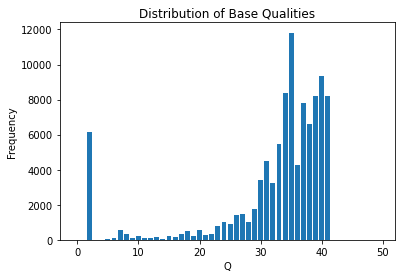

In [218]:
h = createHist(quals)

import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.title('Distribution of Base Qualities')
plt.ylabel('Frequency')
plt.xlabel('Q')

* Base Quality = 2: Clusters where the base color is not confident at all. Therefore, the probablity of having the base is incorrect is very high.

#### Analyzing the GCs in the sequence

* The GC-content of organisms is a highly variable trait.

Text(0, 0.5, 'Percentage')

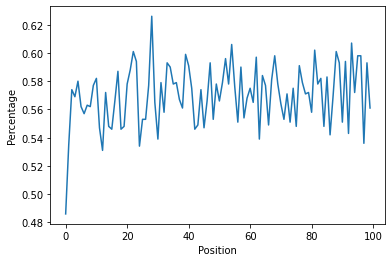

In [219]:
def findGCByPos(reads):
  gc = [0] * 100
  totals = [0] * 100

  for read in reads:
    for i in range(len(read)):
      if read[i] == 'G' or read[i] == 'C':
        gc[i] += 1
      totals[i] += 1
  
  for i in range(len(gc)):
    if totals[i] > 0:
        gc[i] /= float(totals[i])

  return gc

gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.xlabel('Position')
plt.ylabel('Percentage')

In [220]:
import collections
count = collections.Counter()
for seq in seqs:
  count.update(seq)
print(count)

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})


### (07) Challenges with read alignment

* The reads are small portions of the reference genome
* Therefore, the read alignment problem is like looking for millions of needles in the hay stacks 

#### Computational Problems:

* At what offsets does pattern P occur within text T
  --> P: word
  --> There would have been a time for such a word

In [221]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [222]:
def naive(p, t):
  occurrences = []
  for i in range(len(t) - len(p) + 1):    # Loop over alignments
    match = True                          # Initialize match
    for j in range(len(p)):               # Loop over the elements in p
      if t[i+j] != p[j]:                  # Check element in t[i:j] matches with p
        match = False                     # Set match to False
        break                             # Break if one element does not match
    
    if match:                             # Append position i if t[i:j] matches p
      occurrences.append(i)
  
  return occurrences

In [223]:
t = 'There would have been a time for such a word'
p = 'word'
naive(p, t)

[40]

#### Exact matching: naive algorithm

* Let $x = |P|$, $y = |T|$
* How many alignments are possible given $x$ and $y$?

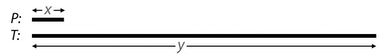

* Quiz 1: How many alignments are possible given $x$ and $y$?
  * Answer: $y - x + 1$

* Quiz 2: What's the greatest # character comparisons possible?
  * Answer: $x(y - x + 1)$

* Quiz 3: What's the least # character comparisons possible?
  * Answer: $y - x + 1$

#### Matching artificial reads



In [224]:
FILE_URL = "https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa"
FILENAME = "phix.fa"
get_file(FILE_URL, FILENAME)

In [225]:
genome = readGenome(FILENAME)
print(genome)

GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGAGTCGAAAAATTATCTTGATAAAGCAGGAATTACTACTGCTTGTTTACGAATTAAATCGAAGTGGACTGCTGGCGGAAAATGAGAAAATTCGACCTATCCTTGCGCAGCTCGAGAAGCTCTTACTTTGCGACCTTTCGCCATCAACTAACGATTCTGTCAAAAACTGACGCGTTGGATGAGGAGAAGTGGCTTAATATGCTTGGCACGTTCGTCAAGGACTGGTTTAGATATGAGTCACATTTTGTTCATGGTAGAGATTCTCTTGTTGACATTTTAAAAGAGCGTGGATTACTATCTGAGTCCGATGCTGTTCAACCACTAATAGGTAAGAAATCATGAGTCAAGTTACTGAACAATCCGTACGTTTCCAGACCGCTTTGGCCTCTATTAAGCTCATTCAGGCTTCTGCCGTTTTGGATTTAACCGAAGATGATTTCGATTTTCTGACGAGTAACAAAGTTTGGATTGCTACTGACCGCTCTCGTGCTCGTCGCTGCGTTGAGGCTTGCGTTTATGGTACGCTGGACTTTGTGGGATACCCTCGCTTTCCTGCTCCTGTTGAGTTTATTGCTGCCGTCATTGCTTATTATGTTCATCCCGTCAACATTCAAACGGCCTGTCTCATCATGGAAGGCGCTGAATTTACGGAAAACATTATTAATGGCGTCGAGCGTCCGGTTAAAGCCGCTGAATTGTTCGCGTTTACCTTGCGTGTACGCGCAGGAAACACTGACGTTCTTACTGACGCAGAAGAAAACGTGCGTCAAAAATTACGTGCGGAAGGAGTGATGTAATGTCTAAAGGTAAAAAACGTTCTGGCGCTCGCCCTGGTCGTCCGCAGCCGTTGCGAGGTACTAAAGGCAAGCGTAAAGGCGCTCGTCTTTGGTATGTAGGTGGTCAACAATTTTAATTGCAGGGGCTTCGGCCCCTTACTTGAGGATAAATT

In [226]:
import random
def generateReads(genome, numReads, readLen):
  reads = []
  for _ in range(numReads):

    start = random.randint(0, len(genome)-readLen) - 1
    reads.append(genome[start : start+readLen])
  return reads

In [227]:
reads = generateReads(genome, 100, 100)
numMatched = 0
for r in reads:
  matches = naive(r, genome)
  if len(matches) > 0:
    numMatched += 1

print('%d / %d reads matched exactly' % (numMatched, len(reads)))

100 / 100 reads matched exactly


In [228]:
numMatched = 0
for r in reads:
  matches = naive(r, genome)

#### Matching real reads

In [229]:
FILE_URL = 'https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq'
FILENAME = 'ERR266411_1.first1000.fastq'
get_file(FILE_URL, FILENAME)

In [230]:
phix_reads, _ = readFastq(FILENAME)

In [231]:
numMatched = 0
n = 0
for r in phix_reads:
  matches = naive(r, genome)
  matches.extend(findComplement(r))
  n += 1
  if len(matches) > 0:
    numMatched += 1

print('%d / %d reads matched exactly' % (numMatched, len(phix_reads)))

1000 / 1000 reads matched exactly


## (08) Quiz


In [232]:
seq = 'CACACTGCACAC'
print('The longest prefix of %s that is also a suffix is %s.' % (seq, longestCommonPrefix(seq, seq[::-1])))


The longest prefix of CACACTGCACAC that is also a suffix is CACAC.


In [234]:
def extract_substring(seq, n):
  # Arguments:
  # seq: The inputted sequence
  # n: The length of the substring extracted

  substrings = []
  for i in range(len(seq)-n+1):
    substrings.append(seq[i:i+n])
  
  return substrings

def query_substring(substrings, query):
  return any([val == query for _ , val in enumerate(substrings)])


# Determining which is not a substring
seq = 'GCTCAGCGGGGCA'
substrings = extract_substring(seq, 3)
queries = ['GCC', 'GCG', 'GCT', 'GCA']

for query in queries:
  print(query, query_substring(substrings, query))

GCC False
GCG True
GCT True
GCA True
